# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s).

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Class 0: Speed limit (20km/h)                                180 samples
Random selects: [10082, 10054, 10044, 10073, 10077, 10030, 10123, 10099, 10132, 10053]


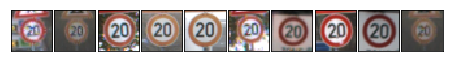

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples
Random selects: [3027, 2522, 3131, 2831, 3306, 2450, 2792, 3958, 3609, 4153]


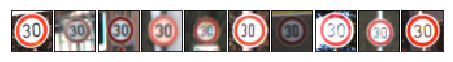

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples
Random selects: [31852, 31924, 31880, 32542, 32939, 32825, 32594, 32962, 32388, 32572]


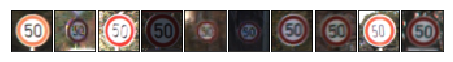

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples
Random selects: [6474, 5699, 5845, 6501, 5631, 5844, 6139, 5868, 6028, 5898]


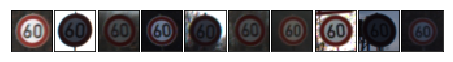

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples
Random selects: [8499, 8380, 7153, 8457, 7586, 6878, 7467, 7777, 7596, 8209]


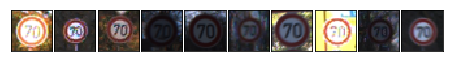

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples
Random selects: [12506, 12867, 13939, 12385, 12439, 13241, 12514, 12629, 12942, 13298]


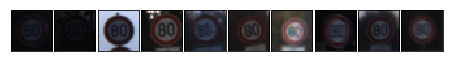

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples
Random selects: [21658, 21679, 21477, 21627, 21647, 21552, 21776, 21697, 21772, 21600]


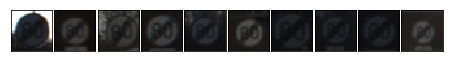

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples
Random selects: [24430, 24588, 24758, 24100, 24277, 23748, 24154, 24950, 24179, 24718]


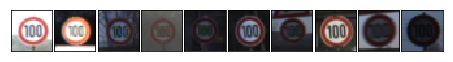

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples
Random selects: [16547, 16145, 17125, 15951, 15999, 15979, 16810, 17062, 15910, 16973]


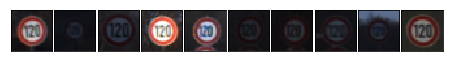

--------------------------------------------------------------------------------------

Class 9: No passing                                          1320 samples
Random selects: [11131, 11927, 12012, 11394, 12195, 11624, 12283, 12205, 11056, 11672]


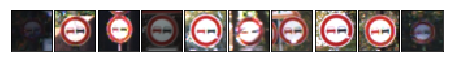

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples
Random selects: [18355, 18645, 17687, 17425, 18410, 18596, 17240, 18229, 18143, 17776]


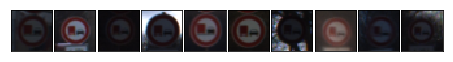

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples
Random selects: [9522, 9655, 8869, 8994, 9304, 8587, 9244, 8603, 8994, 9410]


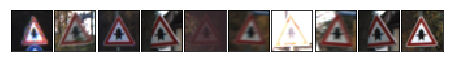

--------------------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples
Random selects: [27659, 28282, 29016, 28196, 28442, 28178, 27382, 28179, 28028, 28575]


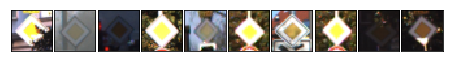

--------------------------------------------------------------------------------------

Class 13: Yield                                               1920 samples
Random selects: [22664, 23392, 22403, 22043, 23032, 23399, 22001, 22989, 23288, 21974]


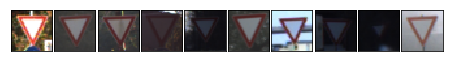

--------------------------------------------------------------------------------------

Class 14: Stop                                                690 samples
Random selects: [29464, 29276, 29804, 29532, 29363, 29882, 29404, 29237, 29768, 29908]


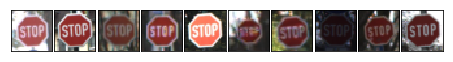

--------------------------------------------------------------------------------------

Class 15: No vehicles                                         540 samples
Random selects: [30041, 30143, 29961, 30153, 30203, 29914, 30428, 30343, 29959, 30182]


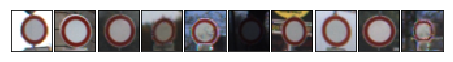

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples
Random selects: [5169, 5141, 5059, 5155, 5188, 5218, 5080, 5224, 5267, 5289]


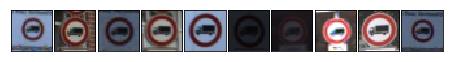

--------------------------------------------------------------------------------------

Class 17: No entry                                            990 samples
Random selects: [31329, 31396, 30457, 31388, 31169, 30468, 30910, 31123, 31082, 31324]


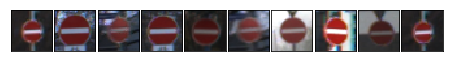

--------------------------------------------------------------------------------------

Class 18: General caution                                     1080 samples
Random selects: [21280, 20406, 20429, 21416, 21356, 21152, 21180, 21245, 21186, 21072]


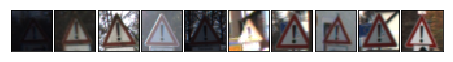

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples
Random selects: [6759, 6769, 6760, 6737, 6705, 6635, 6681, 6667, 6759, 6778]


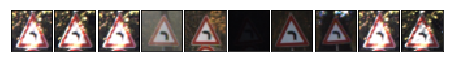

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples
Random selects: [26145, 26094, 26059, 26107, 26239, 26233, 26222, 26025, 26004, 26039]


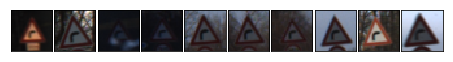

--------------------------------------------------------------------------------------

Class 21: Double curve                                        270 samples
Random selects: [25854, 25701, 25773, 25947, 25809, 25844, 25877, 25860, 25939, 25885]


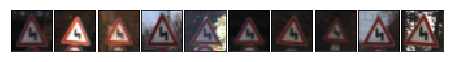

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples
Random selects: [4802, 4552, 4651, 4555, 4813, 4714, 4800, 4659, 4536, 4583]


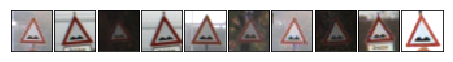

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples
Random selects: [1819, 1841, 1881, 2148, 1968, 1941, 2179, 2189, 1896, 1956]


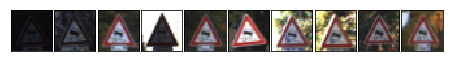

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples
Random selects: [10898, 10882, 10836, 10878, 10800, 10957, 10872, 10845, 10884, 11024]


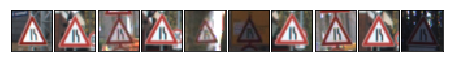

--------------------------------------------------------------------------------------

Class 25: Road work                                           1350 samples
Random selects: [34570, 34025, 33670, 33951, 34386, 34023, 34168, 34173, 34452, 33869]


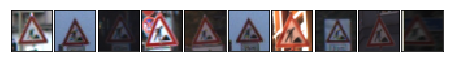

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples
Random selects: [1650, 1280, 1279, 1648, 1316, 1243, 1694, 1297, 1630, 1492]


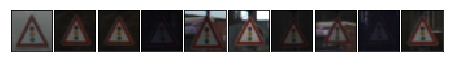

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples
Random selects: [10431, 10355, 10462, 10461, 10552, 10507, 10353, 10557, 10451, 10376]


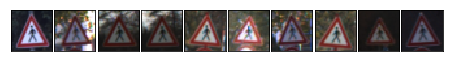

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples
Random selects: [27003, 26875, 27304, 26896, 27276, 27303, 27270, 26915, 27219, 27115]


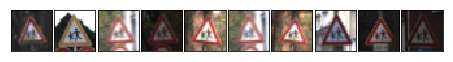

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples
Random selects: [10616, 10764, 10686, 10658, 10613, 10586, 10663, 10761, 10663, 10705]


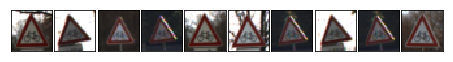

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples
Random selects: [25319, 25393, 25175, 25403, 25393, 25034, 25404, 25385, 25142, 25155]


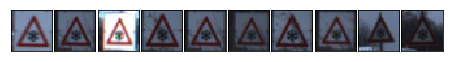

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples
Random selects: [433, 576, 242, 439, 844, 760, 869, 413, 810, 573]


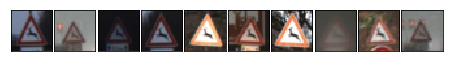

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples
Random selects: [10279, 10266, 10334, 10293, 10345, 10275, 10193, 10313, 10290, 10207]


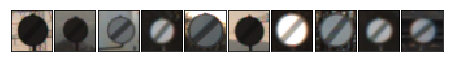

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples
Random selects: [26416, 26496, 26487, 26294, 26655, 26817, 26449, 26399, 26818, 26654]


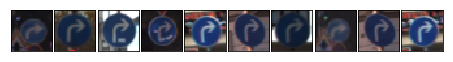

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples
Random selects: [20139, 20328, 20160, 20044, 20174, 20246, 20358, 20031, 20031, 20310]


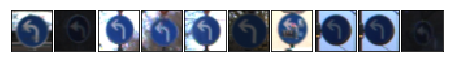

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples
Random selects: [19666, 19971, 19116, 19601, 19568, 19567, 19990, 20007, 19892, 19079]


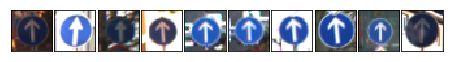

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples
Random selects: [1010, 937, 1140, 961, 1126, 1090, 999, 1139, 1208, 927]


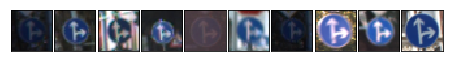

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples
Random selects: [4854, 4879, 4968, 4914, 4847, 4851, 4993, 4919, 4922, 4984]


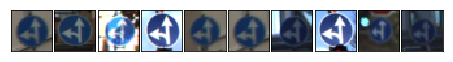

--------------------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples
Random selects: [15750, 15453, 15598, 14243, 14759, 14774, 15601, 15444, 15370, 15254]


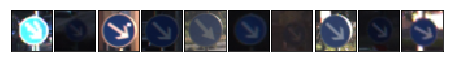

--------------------------------------------------------------------------------------

Class 39: Keep left                                           270 samples
Random selects: [25561, 25498, 25435, 25560, 25522, 25528, 25619, 25629, 25477, 25548]


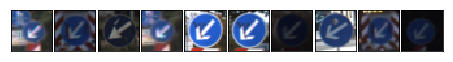

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples
Random selects: [4204, 4412, 4411, 4329, 4469, 4494, 4325, 4361, 4246, 4350]


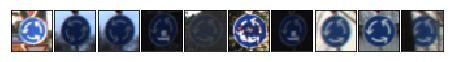

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples
Random selects: [51, 197, 173, 204, 132, 52, 133, 195, 145, 155]


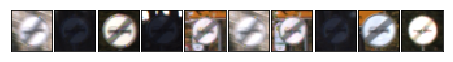

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples
Random selects: [9886, 9917, 9933, 9828, 9799, 9831, 9918, 9877, 9907, 9791]


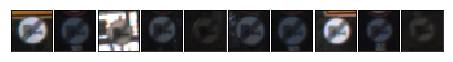

--------------------------------------------------------------------------------------



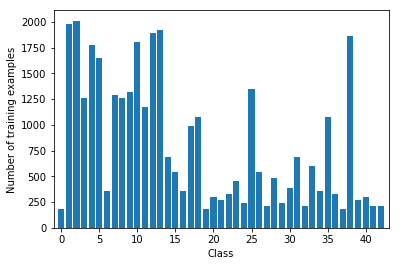

In [5]:
'''
This cell shows the numbers for each class, and the overall distribution.
'''
import random
import pandas as pd

signnames = pd.read_csv('signnames.csv')['SignName'].tolist()
col_width = max(len(name) for name in signnames)
sign_classes = 43

class_indices = [np.where(y_train == i)[0] for i in range(sign_classes)]
class_counts = [len(cls_indices) for cls_indices in class_indices]
sign_classes = [cls for cls in range(43)]
random_samples = []

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = plt.figure(figsize = (6, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = [random.choice(c_index) for i in range(10)]
    random_samples.append(random_indices)
    print("Random selects: {}".format(random_indices))
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")
    
plt.bar( np.arange( 43 ), class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

### Summary
By watching the the distribution shape of our dataset, we can tell it's really unbalanced. Some classes are even 10 times larger
than another, so before building my model i need to extend the dataset by applying data argumentation.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Model is trained and test on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Data argumentaiton

In [1]:
'''
### Data Cleaning ####
Before data argumentation, notice that some images have really bad qualities.
For example too dark & too blury. This can affect our training.
Removing the exposure effects from all images and sharpen them can solve this problem.
################################################################################################
'''

def sharpen_img(image):
    gb = cv2.GaussianBlur(image, (5,5), 20.0)
    return cv2.addWeighted(image, 2, gb, -1, 0)
    
def remove_exposure(image):
    return exposure.equalize_adapthist(image) 


'''
### Data argumentation methods ####
The dataset is really unbalanced, this is when data argumentation comes in.
Data argumentation methods like translation/perspective-tranform/rotation/scaling are used in this case.
################################################################################################
'''
import numpy as np
import cv2
from sklearn.utils import shuffle
from skimage import exposure
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
from numpy import random


def flip(image, type = 'horizontal'):
    if type == 'horizontal':
        return image[:,::-1,:]
    elif type == 'vertical':
        return image[::-1,:,:]
    
def random_shift(image, multiplier = 0.2):
    rows ,cols, _ = image.shape
    
    upper_bound_x = int(cols*multiplier)
    lower_bound_x = int(cols*multiplier)*-1
    upper_bound_y = int(rows*multiplier)
    lower_bound_y = int(rows*multiplier)*-1  
    
    shift_x = np.random.randint(lower_bound_x, upper_bound_x)
    shift_y = np.random.randint(lower_bound_y, upper_bound_y)
    
    M = np.float32([[1,0,shift_x],[0,1,shift_y]])
    image = cv2.warpAffine(image,M,(cols,rows))
    
    return image

def random_zoom(image, factor = 0.2):
    multiplier = factor
    rows, cols, _ = image.shape
    
    offset = np.random.randint(int(cols*multiplier))
    
    min_x = 0 + offset
    max_x = cols - offset
    min_y = 0 + offset
    max_y = rows - offset
    
    
    pts1 = np.float32([[min_x, min_y],[max_x, min_y],[min_x, max_y],[max_x, max_y]])
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    image = cv2.warpPerspective(image ,M , (rows, cols))
    
    return image
                
def random_rotation(image, degree = 20):
    lower_bound_degree = -1 * degree
    upper_bound_degree = degree
    rotation= np.random.randint(lower_bound_degree, degree)
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), rotation, 1)
    image = cv2.warpAffine(image, M, (cols,rows))
    
    return image

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
 
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
 
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
 
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
 
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
    # return the warped image
    return warped

def projection_transform(image, itencity = 0.75):
    img_size = image.shape[0]
    
    d = img_size * 0.3 * itencity

    top_left_x = random.uniform(-d, d) + 0
    top_left_y = random.uniform(-d, d) + 0
    top_left = (top_left_x, top_left_y)

    top_right_x = img_size - random.uniform(-d, d)
    top_right_y = random.uniform(-d, d) + 0
    top_right = (top_right_x, top_right_y)

    bottom_right_x = img_size - random.uniform(-d, d)
    bottom_right_y = img_size - random.uniform(-d, d)
    bottom_right = (bottom_right_x, bottom_right_y)

    bottom_left_x = random.uniform(-d, d) + 0
    bottom_left_y = img_size - random.uniform(-d, d)
    bottom_left = (bottom_left_x, bottom_left_y)


    cood = np.array([top_left, top_right, bottom_right, bottom_left])
    new_image = four_point_transform(image,  cood)
    return new_image

def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
 
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
 
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
 
    # return the ordered coordinates
    return rect

### Data argumentation in Viz

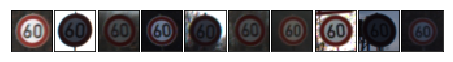

C:\Users\User\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


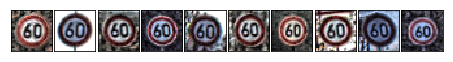

In [7]:
'''
See how the images look like by removing the exposure effects.
'''
from skimage import exposure

bad_quality_cls = 3

fig = plt.figure(figsize = (6, 2))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(10):
    axis = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(X_train[random_samples[bad_quality_cls][i]])
plt.show()

fig = plt.figure(figsize = (6, 2))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(10):
    axis = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    rm_exp = exposure.equalize_adapthist(X_train[random_samples[3][i]])
    axis.imshow(rm_exp)
plt.show()


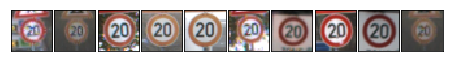

flip:-----------------------------------------------------------



C:\Users\User\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


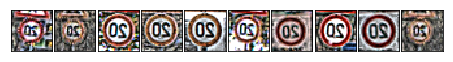

random_shift:-----------------------------------------------------------



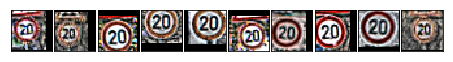

random_rotation:-----------------------------------------------------------



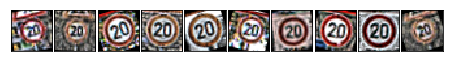

projection_transform:-----------------------------------------------------------



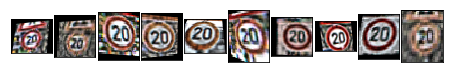

random_zoom:-----------------------------------------------------------



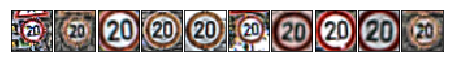

In [8]:
'''
Now we've seen how great our solutioons worked out.
Let's visualize the data-argumentation.
'''
import matplotlib.pyplot as plt
# Data argumentation functions
arg_functions = {'random_shift': random_shift,
                 'random_zoom':random_zoom,
                 'flip':flip,
                 'random_rotation':random_rotation,
                 'projection_transform':projection_transform}


# Visualize the raw data
fig = plt.figure(figsize = (6, 2))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(10):
    axis = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(X_train[random_samples[0][i]])
plt.show()

# Visualize the Data argumentation.
for func in arg_functions:
    print('{}:-----------------------------------------------------------\n'.format(func))
    fig = plt.figure(figsize = (6, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    for i in range(10):
        axis = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
        img = sharpen_img(X_train[random_samples[0][i]])
        img = exposure.equalize_adapthist(img)
        img = arg_functions[func](img)
        axis.imshow(img)
    plt.show()

### Pre-process the Data Set (normalization, grayscale, etc.)

In [90]:
from sklearn.utils import shuffle
from skimage import exposure

def preprocess_dataset(X, y = None):
    
    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
        
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i])
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(num_classes)[y]
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y


def data_argumentation():
    flipable_horizontle = [11, 12, 13, 18, 22, 26, 30, 35]
    flipable_horizontleAndVerticle = [15, 17]
    cross_flipable = {'19':20, 
                      '33':34, 
                      '36':37, 
                      '38':39, 
                      '20':19, 
                      '34':33, 
                      '37':36, 
                      '39':38}
    n_classes = 43
    
    
    X_extended = [image for image in X_train]
    y_extended = [number for number in y_train]
    num_mean = X_train.shape[0] // n_classes
    
    for i in range(n_classes):
        images_i = X_train[y_train == i] #列出所有此類別的圖片
        label_i = i
        num_i_images = images_i.shape[0] 
        
                       
        if num_i_images < num_mean:
            for index, image in enumerate(images_i):
                
                zoom = random_zoom(image)
                isRotated_zoom = np.random.randint(0, 2)
                zoom = zoom if isRotated_zoom == 0 else random_rotation(zoom)
                X_extended.append(zoom)
                y_extended.append(i)
                
                shift = random_shift(image)
                isRotated_shift = np.random.randint(0, 2)
                shift = shift if isRotated_shift == 0 else random_rotation(shift)
                X_extended.append(shift)
                y_extended.append(i)
                
                
                projection = cv2.resize(projection_transform(image), (32, 32))
                X_extended.append(projection)
                y_extended.append(i)
                
                if i in flipable_horizontle:
                    flip_h_a = flip(image)
                    isRotated_flip_a = np.random.randint(0, 2)
                    flip_h_a = flip_h_a if isRotated_flip_a == 0 else random_rotation(flip_h_a)
                    X_extended.append(flip_h_a)
                    y_extended.append(i)
                    
                if i in flipable_horizontleAndVerticle:
                    flip_h_b = flip(image)
                    isRotated_flip_b = np.random.randint(0, 2)
                    flip_h_b = flip_h_b if isRotated_flip_b == 0 else random_rotation(flip_h_b)
                    X_extended.append(flip_h_b)
                    y_extended.append(i)
                    
                    flip_v_b = flip(image, 'vertical')
                    isRotated_flip_b = np.random.randint(0, 2)
                    flip_v_b = flip_v_b if isRotated_flip_b == 0 else random_rotation(flip_v_b)
                    X_extended.append(flip_v_b)
                    y_extended.append(i)
                
                cross_flip_class = cross_flipable.get(str(i))
                if cross_flip_class != None:
                    flip_h_c = flip(image)
                    isRotated_flip_c = np.random.randint(0, 2)
                    flip_h_c = flip_h_c if isRotated_flip_c == 0 else random_rotation(flip_h_c)
                    X_extended.append(flip_h_c)
                    y_extended.append(cross_flip_class)
    X_extended, y_extended = np.array(X_extended), np.array(y_extended)        
    X_extended, y_extended = shuffle(X_extended, y_extended)   
    return X_extended, y_extended

## Model Architecture

##### Helper functions
Helper functions to create a CNN architecture

In [11]:
def new_weights(shape):
    initializer = tf.contrib.layers.xavier_initializer_conv2d()
    return tf.Variable(initializer(shape = shape))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape = [length]))

def new_convLayer(input, num_input, num_filter, filter_size, pooling = True):
    shape = [filter_size, filter_size, num_input, num_filter]
    weights = new_weights(shape)
    biases = new_biases(num_filter)
    
    con_layer = tf.nn.conv2d(input = input,
                             filter = weights,
                             strides = [1, 1, 1, 1],
                             padding = 'SAME'
                            )
    con_layer += biases
    
    if pooling:
        con_layer = tf.nn.max_pool(value = con_layer,
                                   ksize = [1, 2, 2, 1],
                                   strides = [1, 2, 2, 1],
                                   padding = 'SAME'
                                  )
    con_layer = tf.nn.relu(con_layer)
    return con_layer, weights

def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

##### Hyper parameters

In [16]:
image_size = 32
image_flatten = image_size**2
img_shape = (image_size, image_size)
num_image_channel = 1
num_classes = 43

In [17]:
num_conv1_filters = 24
conv1_filter_size = 5

num_conv2_filters = 36
conv2_filter_size = 5

num_conv3_filters = 48
conv3_filter_size = 5

num_conv4_filters = 64
conv4_filter_size = 3

num_conv5_filters = 64
conv5_filter_size = 3

num_fc1 = 1024
num_fc2 = 512
num_fc3 = 43

##### Placeholder variables

In [18]:
x = tf.placeholder(tf.float32, shape = [None, image_size, image_size, num_image_channel], name = 'x')
y = tf.placeholder(tf.float32, shape = [None, num_classes], name = 'y_true')
y_true_cls = tf.argmax(y, dimension=1)
keep_prob = tf.placeholder(tf.float32)

##### Model

In [19]:
def NET():
    # Conv layers
    layer_conv1, weights_conv1 = \
                                new_convLayer(input = x, 
                                              num_input = num_image_channel, 
                                              num_filter = num_conv1_filters, 
                                              filter_size = conv1_filter_size, pooling = True)

    layer_conv2, weights_conv2 = \
                            new_convLayer(input = layer_conv1, 
                                          num_input = num_conv1_filters, 
                                          num_filter = num_conv2_filters, 
                                          filter_size = conv2_filter_size, 
                                          pooling = True)

    layer_conv3, weights_conv3 = \
                                new_convLayer(input = layer_conv2, 
                                              num_input = num_conv2_filters, 
                                              num_filter = num_conv3_filters, 
                                              filter_size = conv3_filter_size, 
                                              pooling = True)
    layer_conv4, weights_conv4 = \
                                new_convLayer(input = layer_conv3, 
                                              num_input = num_conv3_filters, 
                                              num_filter = num_conv4_filters, 
                                              filter_size = conv4_filter_size, 
                                              pooling = True)

    layer_conv5, weights_conv5 = \
                                new_convLayer(input = layer_conv4, 
                                              num_input = num_conv4_filters, 
                                              num_filter = num_conv5_filters, 
                                              filter_size = conv5_filter_size, 
                                              pooling = True)

    layer_flatten, num_features = flatten_layer(layer_conv5)

    # Fully connected layers

    fc1 = new_fc_layer(layer_flatten, num_features, num_fc1)

    fc2 = new_fc_layer(fc1, num_fc1, num_fc2)

    fc3 = new_fc_layer(fc2, num_fc2, num_fc3, use_relu=False)
    
    return fc3

init = tf.global_variables_initializer()

# Instance
net = NET()

# Prediction
y_pred = tf.nn.softmax(net)
y_pred_cls = tf.argmax(y_pred, dimension=1)


# trial and error
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=net,
                                                        labels=y)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [89]:
# Data argumentation
x_, y_ = data_argumentation()
x_, y_ = preprocess_dataset(x_, y_)
# Validation set
X_valid, y_valid =  preprocess_dataset(X_valid, y_valid)
# Test set
X_test_, y_test_ = preprocess_dataset(X_test, y_test)

In [33]:
import time
import tensorflow as tf

start_time = time.time()
EPOCHS = 10
BATCH_SIZE = 128
dropout = 0.5
folder = './tmp/'
saver = tf.train.Saver()
num_examples = x_.shape[0]


session = tf.Session()
session.run(tf.global_variables_initializer())

print("Training...")
for i in range(EPOCHS):
    print("EPOCH {} ".format(i+1))

    X_t, y_t,  = shuffle(x_, y_)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y= X_t[offset:end], y_t[offset:end]
        feed_dict_train = {x: batch_x,
                           y: batch_y}
        session.run(optimizer, feed_dict=feed_dict_train)
        if offset % 1000 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            train_msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(offset, acc))
    feed_dict_valid = {x: X_valid,
                       y: y_valid}
    valid_acc = session.run(accuracy, feed_dict = feed_dict_valid)
    print("Validation Accuracy: {0:>6.1%}".format(valid_acc))

save_path = saver.save(session, "./tmp/model_2.ckpt")
session.close()

Training...
EPOCH 1 
Optimization Iteration:      0, Training Accuracy:   4.7%
Optimization Iteration:  16000, Training Accuracy:  27.3%
Optimization Iteration:  32000, Training Accuracy:  50.0%
Optimization Iteration:  48000, Training Accuracy:  73.4%
Optimization Iteration:  64000, Training Accuracy:  78.9%
Validation Accuracy:  81.2%
EPOCH 2 
Optimization Iteration:      0, Training Accuracy:  79.7%
Optimization Iteration:  16000, Training Accuracy:  83.6%
Optimization Iteration:  32000, Training Accuracy:  89.8%
Optimization Iteration:  48000, Training Accuracy:  93.0%
Optimization Iteration:  64000, Training Accuracy:  93.0%
Validation Accuracy:  89.5%
EPOCH 3 
Optimization Iteration:      0, Training Accuracy:  92.2%
Optimization Iteration:  16000, Training Accuracy:  88.3%
Optimization Iteration:  32000, Training Accuracy:  93.0%
Optimization Iteration:  48000, Training Accuracy:  94.5%
Optimization Iteration:  64000, Training Accuracy:  97.7%
Validation Accuracy:  93.5%
EPOCH 4

In [34]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp/model_2.ckpt")
    acc = sess.run(accuracy, feed_dict={x: X_test_, y: y_test_})

print('Model performs a %s percent accuracy on the test set !' % str(acc*100)[:5])

Model performs a 93.16 percent accuracy on the test set !


## Step 3: Test a Model on New Images

### Load and Output the Images

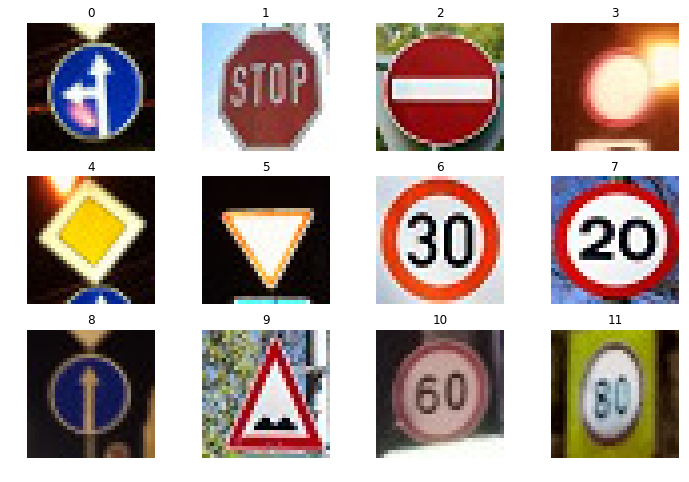

In [91]:
### Load the images and plot them.
import os
import matplotlib.pyplot as plt
import cv2

foler = 'new_images/imgs/'
test_img_paths = os.listdir(foler)
IMAGEES = []
plt.figure(figsize=(12, 8))
for i, name_img in enumerate(test_img_paths):
    image = cv2.imread('{}{}'.format(foler, name_img))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 4, i+1)
    plt.imshow(image) 
    plt.title(i)
    plt.axis('off')
    IMAGEES.append(image)
plt.show()

# Preprocess new images
IMAGEES = np.array(IMAGEES)
preprocessde_IMAGEES = preprocess_dataset(IMAGEES)

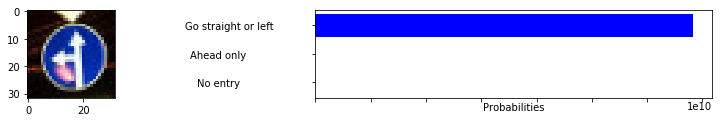

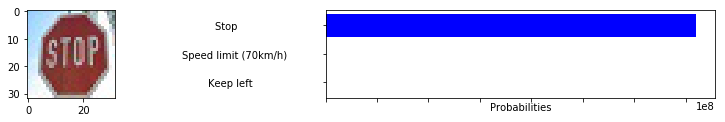

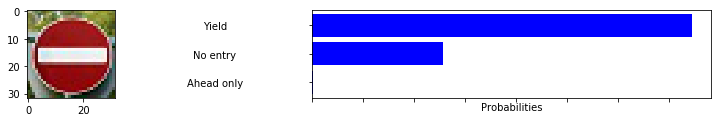

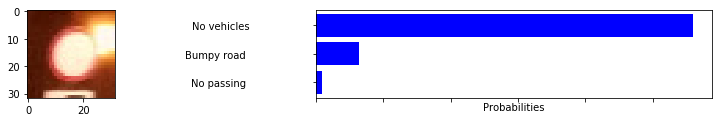

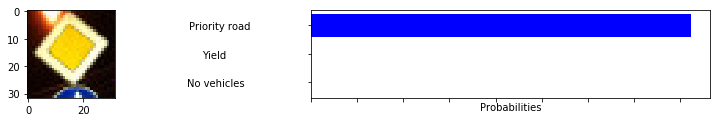

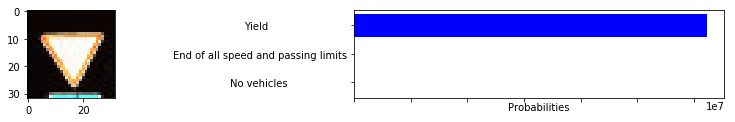

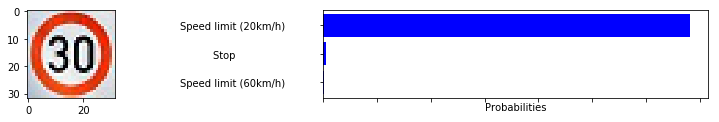

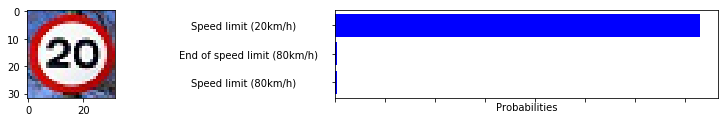

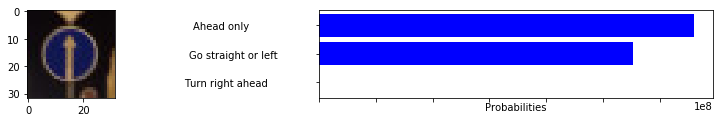

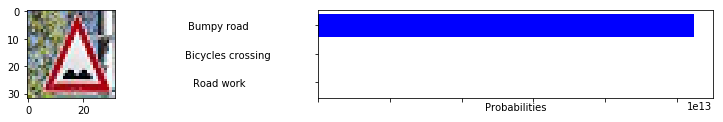

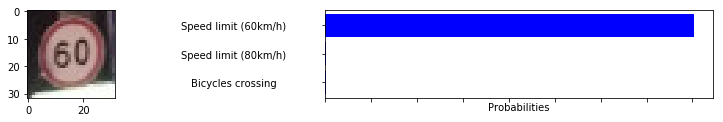

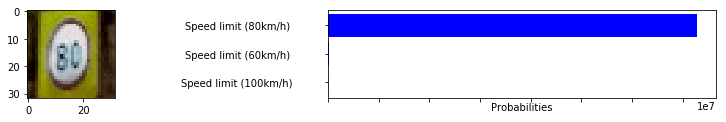

In [96]:
# Get labels
labels = pd.read_csv('new_images\labels\extra_images.csv')
signs = labels['classId'].tolist()
signs_one_hot = np.eye(43)[signs]

saver = tf.train.Saver()
top_k = tf.nn.top_k(net, k=3)

with tf.Session() as sess:
    tf.train.Saver().restore(sess, "./tmp/model_2.ckpt")
    probs, id = sess.run(top_k, feed_dict={x: preprocessde_IMAGEES[0]})
    
probs = np.exp(probs)
y_pos = np.arange(3)
for i in range(IMAGEES.shape[0]):
    plt.figure(i+1, figsize=(12, 2))
    img = plt.subplot(1, 2, 1)
    img.imshow(IMAGEES[i])
    pred = plt.subplot(1, 2, 2)
    pred.barh(y_pos, probs[i], color='blue')
    pred.set_yticks(y_pos)
    pred.invert_yaxis()
    signname = '{:<30}'
    pred.set_yticklabels([signname.format(signnames[index]) for index in id[i]])
    pred.set_xlabel("Probabilities")
    plt.tight_layout()
    plt.setp(pred.get_xticklabels(), visible=False)
plt.show()